# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [4]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

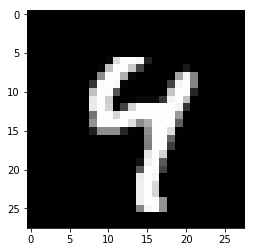

In [5]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [7]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size))
targets_ = tf.placeholder(tf.float32, (None, image_size))

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [8]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [10]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6960
Epoch: 1/20... Training loss: 0.6926
Epoch: 1/20... Training loss: 0.6894
Epoch: 1/20... Training loss: 0.6859
Epoch: 1/20... Training loss: 0.6818
Epoch: 1/20... Training loss: 0.6769
Epoch: 1/20... Training loss: 0.6707
Epoch: 1/20... Training loss: 0.6643
Epoch: 1/20... Training loss: 0.6553
Epoch: 1/20... Training loss: 0.6466
Epoch: 1/20... Training loss: 0.6361
Epoch: 1/20... Training loss: 0.6237
Epoch: 1/20... Training loss: 0.6094
Epoch: 1/20... Training loss: 0.5960
Epoch: 1/20... Training loss: 0.5809
Epoch: 1/20... Training loss: 0.5641
Epoch: 1/20... Training loss: 0.5493
Epoch: 1/20... Training loss: 0.5302
Epoch: 1/20... Training loss: 0.5122
Epoch: 1/20... Training loss: 0.4994
Epoch: 1/20... Training loss: 0.4804
Epoch: 1/20... Training loss: 0.4603
Epoch: 1/20... Training loss: 0.4454
Epoch: 1/20... Training loss: 0.4306
Epoch: 1/20... Training loss: 0.4114
Epoch: 1/20... Training loss: 0.4040
Epoch: 1/20... Training loss: 0.3891
E

Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1831
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1827
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1818
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1837
Epoch: 1/20... Training loss: 0.1823
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1859
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1816
Epoch: 2/20... Training loss: 0.1850
Epoch: 2/20... Training loss: 0.1843
Epoch: 2/20... Training loss: 0.1837
Epoch: 2/20... Training loss: 0.1931
Epoch: 2/20... Training loss: 0.1844
Epoch: 2/20... Training loss: 0.1868
Epoch: 2/20... Training loss: 0.1880
Epoch: 2/20... Training loss: 0.1903
Epoch: 2/20... Training loss: 0.1766
E

Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1481
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1459
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1510
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1532
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1464
E

Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1275
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1252
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1287
Epoch: 3/20... Training loss: 0.1296
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1268
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1257
E

Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1208
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1201
E

Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1122
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1107
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1041
E

Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1061
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1005
E

Epoch: 8/20... Training loss: 0.1014
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0967
E

Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0926
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.1037
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0964
E

Epoch: 9/20... Training loss: 0.0929
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0932
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0971
E

Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0911
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0993
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0884
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0893
Epoch: 13/20... Training loss: 0.0996
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0887
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0901
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0982
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0884
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0906
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

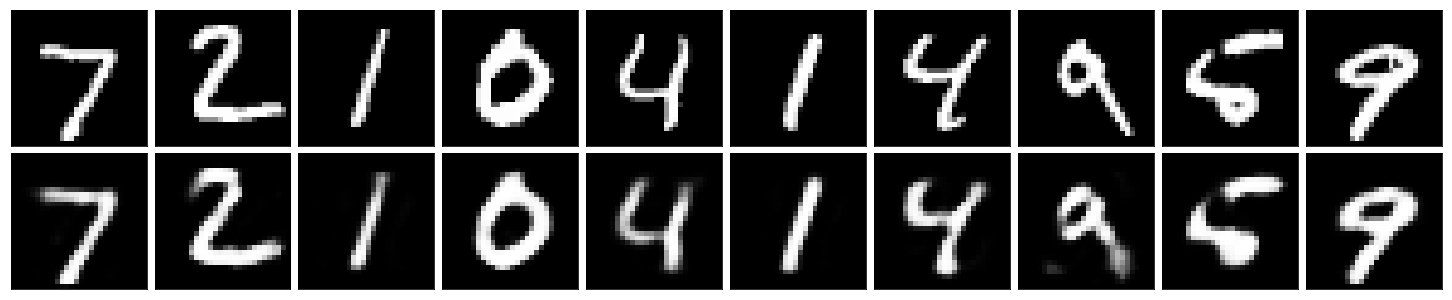

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [12]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.